In [1]:
from poola import core as pool
import pandas as pd
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt

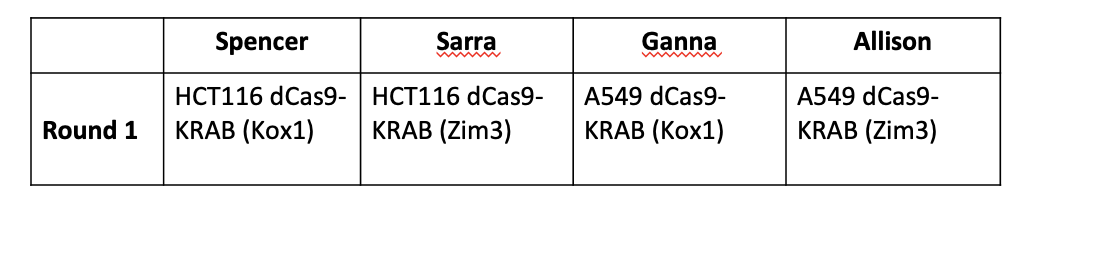

          - KRAB (Zim3)   KRAB (Zim3)
    - A549     x            
    - A549       x            x


In [2]:
# readcount files
file_path = "../Data/PrimaryLibrary/tiling/A549_Zim3/"
A549_Zim3 = pd.read_table(file_path + 'counts-AU_A549_RDB182.txt')


In [3]:
A549_Zim3.head()

,Construct Barcode,Construct IDs,A549_RDB_182 repA,pDNA CP1948,A549_RDB_182 repB,Unlabeled Sample Barcodes
0,ATAGCGACGTCCGTTGGACA,ATAGCGACGTCCGTTGGACA,194,87,168,0
1,ACCCGGACTACGCCATGTTG,ACCCGGACTACGCCATGTTG,74,89,123,0
2,AGTACCCCTATTCAACCGGA,AGTACCCCTATTCAACCGGA,349,67,303,0
3,TAATCAGAGGAACTACGTTT,TAATCAGAGGAACTACGTTT,240,86,310,0
4,TATGGCTGTCACCTAGATCA,TATGGCTGTCACCTAGATCA,143,103,145,0


In [4]:
# additional information on the readcount files
col6 = pd.read_csv('../Data/PrimaryLibrary/design/CRISPRi_6col_sgRNA.csv')
ess_noness = pd.read_csv('../Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
ess_noness = ess_noness[['Target Gene Symbol','Target Gene ID','Category','TSS Position', 
       'sgRNA \'Cut\' Site TSS Offset','sgRNA Sequence', 
           'sgRNA Context Sequence', 'On-Target Ruleset',
       'On-Target Efficacy Score']]
ess_noness = pd.merge(col6[['Target Gene Symbol', 'sgRNA Sequence']], ess_noness)
ess_noness.head()

,Target Gene Symbol,sgRNA Sequence,Target Gene ID,Category,TSS Position,sgRNA 'Cut' Site TSS Offset,sgRNA Context Sequence,On-Target Ruleset,On-Target Efficacy Score
0,ATP5F1B,ATAGCGACGTCCGTTGGACA,506.0,Essential,56645984.0,-255.0,GATCATAGCGACGTCCGTTGGACAGGGTAA,RS3seq-Chen2013,0.9257
1,ATP5F1B,ACCCGGACTACGCCATGTTG,506.0,Essential,56645984.0,24.0,CTCCACCCGGACTACGCCATGTTGGGGTTT,RS3seq-Chen2013,0.7588
2,ATP5F1B,AGTACCCCTATTCAACCGGA,506.0,Essential,56645984.0,396.0,GTTCAGTACCCCTATTCAACCGGAAGGTCA,RS3seq-Chen2013,0.7492
3,ATP5F1B,TAATCAGAGGAACTACGTTT,506.0,Essential,56645984.0,-278.0,AGGGTAATCAGAGGAACTACGTTTAGGAAA,RS3seq-Chen2013,0.7506
4,ATP5F1B,TATGGCTGTCACCTAGATCA,506.0,Essential,56645984.0,-362.0,CCCCTATGGCTGTCACCTAGATCAAGGACC,RS3seq-Chen2013,0.9978


# process A549_Zim3


In [5]:
lognorms_A549_Zim3 = pool.lognorm_columns(reads_df=A549_Zim3, columns=['A549_RDB_182 repA','pDNA  CP1948', 'A549_RDB_182 repB'])
filtered_lognorms_lognorms_A549_Zim3 = pool.filter_pdna(lognorm_df=lognorms_A549_Zim3, pdna_cols=['pDNA  CP1948'], z_low=-3)
print('Filtered ' + str(lognorms_A549_Zim3.shape[0] - filtered_lognorms_lognorms_A549_Zim3.shape[0]) + ' rows due to low pDNA abundance')


Filtered 576 rows due to low pDNA abundance


In [6]:
lfc_df_A549_Zim3 = pool.calculate_lfcs(lognorm_df=filtered_lognorms_lognorms_A549_Zim3, 
                                         ref_col='pDNA  CP1948', target_cols=['A549_RDB_182 repA', 'A549_RDB_182 repB'])
lfc_df_A549_Zim3.head()


,Construct Barcode,Construct IDs,A549_RDB_182 repA,A549_RDB_182 repB,Unlabeled Sample Barcodes
0,ATAGCGACGTCCGTTGGACA,ATAGCGACGTCCGTTGGACA,-1.446422,-1.657960,0
1,ACCCGGACTACGCCATGTTG,ACCCGGACTACGCCATGTTG,-2.391727,-1.997719,0
2,AGTACCCCTATTCAACCGGA,AGTACCCCTATTCAACCGGA,-0.422872,-0.658880,0
3,TAATCAGAGGAACTACGTTT,TAATCAGAGGAACTACGTTT,-1.192328,-0.955827,0
4,TATGGCTGTCACCTAGATCA,TATGGCTGTCACCTAGATCA,-1.991386,-2.031652,0


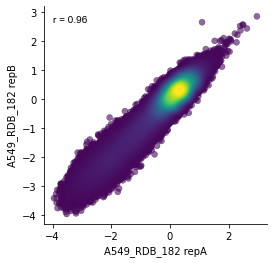

In [7]:
plt.subplots(figsize=(4,4))
gpplot.point_densityplot(data=lfc_df_A549_Zim3, x='A549_RDB_182 repA', y='A549_RDB_182 repB')
gpplot.add_correlation(data=lfc_df_A549_Zim3, x='A549_RDB_182 repA', y='A549_RDB_182 repB')
sns.despine()

In [8]:
lfc_df_A549_Zim3 = lfc_df_A549_Zim3[['Construct Barcode','A549_RDB_182 repA','A549_RDB_182 repB' ]]

In [9]:
avg_replicate_lfc_df_A549_Zim3 = pool.average_replicate_lfcs(lfcs=lfc_df_A549_Zim3, guide_col='Construct Barcode', condition_indices=[0],
                                                   sep='_')
avg_replicate_lfc_df_A549_Zim3.head()

,Construct Barcode,condition,avg_lfc,n_obs
0,AAAAAAAAAAATTAGTCGTA,A549,-0.467945,2
1,AAAAAAAAAACAGGACACAG,A549,-0.107987,2
2,AAAAAAAAAAGAGTACGCCA,A549,-0.400645,2
3,AAAAAAAAAAGGGCACCAAG,A549,0.136550,2
4,AAAAAAAAAAGGTCATTCAG,A549,0.216872,2


In [10]:
avg_replicate_lfc_df_A549_Zim3.rename(columns={'Construct Barcode':'sgRNA Sequence'}, inplace = True)

# Calculate Z-score using Intergenic control

In [11]:
annot_guide_lfcs_A549_Zim3 = pool.annotate_guide_lfcs(avg_replicate_lfc_df_A549_Zim3, ess_noness, 'Target Gene Symbol',
                                            merge_on='sgRNA Sequence', z_score_neg_ctls=True,
                                            z_score_neg_ctl_genes='ONE_INTERGENIC')

In [12]:
labels = ['[-1000, -500)', '[-500, -400)', '[-400, -300)',
          '[-300, -200)','[-200, -100)', '[-100, -50)', '[-50, 0)',
          '[0, 50)','[50, 100)', '[100, 200)', '[200, 300)',
          '[300, 400)','[400, 500)', '[500, 1000)',]

cut_list =  [-1000, -500, -400, -300, -200, 
             -100, -50, 0, 50, 100, 200, 300, 400, 
             500,  1000]

# bin data based on range of possible values
annot_guide_lfcs_A549_Zim3['TSS Bucket'] = pd.cut(annot_guide_lfcs_A549_Zim3['sgRNA \'Cut\' Site TSS Offset'], cut_list, labels=labels)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

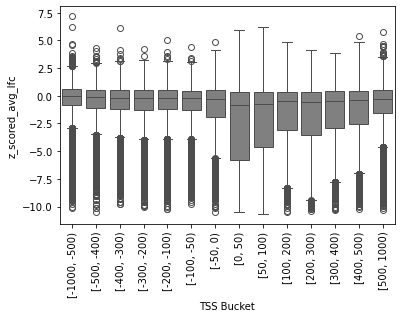

In [13]:
sns.boxplot(
                x = annot_guide_lfcs_A549_Zim3['TSS Bucket'], 
                y = annot_guide_lfcs_A549_Zim3['z_scored_avg_lfc'], color = 'grey')

plt.xticks(rotation=90)


In [14]:
path_out = '../Data/PrimaryLibrary/processed_z_score/'
annot_guide_lfcs_A549_Zim3.to_csv(path_out + 'A549_Zim3_zscore.csv', index = False)